In [ ]:
from google.colab import drive
drive.mount('/drive')
 
#Optional: move to the desired location:
%cd /drive/My Drive/500

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
/drive/My Drive/500


In [ ]:
from sklearn.preprocessing import LabelEncoder
# from sklearn.svm import LinearSVC
# from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pandas as pd 
from imutils import paths
import numpy as np
import argparse
import imutils
import cv2
import os
import _pickle as cPickle
from sklearn.metrics import accuracy_score
from skimage.filters import threshold_otsu
import pickle
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

from skimage import color, data, restoration

# from scipy.signal import convolve2d as conv2

from scipy.misc import face
from scipy.signal.signaltools import wiener
import matplotlib.pyplot as plt
import numpy as np

from scipy import ndimage
from scipy.stats import skew
from scipy.stats import kurtosis
import csv

In [ ]:
def get_denoising(image):
    

    # resizing = cv2.resize(image, (224, 224)) 
    gray = cv2.cvtColor(resizing, cv2.COLOR_BGR2GRAY)


    gauss =gray.astype("float32")


    filtered_img = wiener(gauss, (5, 5))  #Filter the image
    filtered_img = np.uint8(filtered_img / filtered_img.max() * 255)


    
    kernel = np.ones((5, 5), np.uint8)
    blackhat = cv2.morphologyEx(filtered_img, cv2.MORPH_BLACKHAT, kernel)

    ret,th = cv2.threshold(blackhat,1,255,cv2.THRESH_BINARY)
    ret,thresh2 = cv2.threshold(th,0,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)

#     img = cv2.inpaint(gray,thresh2,1,cv2.INPAINT_TELEA)
    img = cv2.inpaint(gray,thresh2,1,cv2.INPAINT_TELEA)
    
    return img
   





In [ ]:

def hsv_image(img):
    

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#     H = hsv[:,:,0]
#     S = hsv[:,:,1]
#     V = hsv[:,:,2]
    h, s, v = cv2.split(hsv)
 
    features = [   
            
                   np.mean(h),
                   np.mean(s),
                   np.mean(v),

                   np.std(h),
                   np.std(s),
                   np.std(v),

                   np.var(h),
                   np.var(s),
                   np.var(v),


                   skew(h, axis=None),
                   skew(s, axis=None),
                   skew(v, axis=None), 
               
                   kurtosis(h, None, fisher=False),
                   kurtosis(s, None, fisher=False),
                   kurtosis(v, None, fisher=False)]

    fitur={
        "mean_h" :features[0],
        "mean_s" :features[1],
        "mean_v" :features[2],

        "std_h":features[3],
        "std_s":features[4],
        "std_v":features[5],

        "var_h":features[6],
        "var_s":features[7],
        "var_v":features[8],

        "skew_h":features[9],
        "skew_s":features[10],
        "skew_v":features[11],
        
        
        "kurt_h":features[12],
        "kurt_s":features[13],
        "kurt_v":features[14]



    }
    print(fitur)
    return fitur


In [ ]:
# imagePaths = list(paths.list_images('/drive/My Drive/Data_Baru10'))

In [ ]:
# data_hsv = []
# # labels = pd.DataFrame(columns=['label'])
# data_glcm =[]
# labels=[]

train_hsv = []
# labels = pd.DataFrame(columns=['label'])
train_glcm =[]
labels_train=[]

# image_fitur.append(fitur)


In [ ]:
train_path = list(paths.list_images("/drive/My Drive/Manual/Train"))
testing_path = list(paths.list_images("/drive/My Drive/Manual/Test"))

**Train**


In [ ]:
# for (i, imagePath) in enumerate(imagePaths):
for (i, imagePath) in enumerate(train_path):
    image = cv2.imread(imagePath)
    resizing = cv2.resize(image, (224, 224)) 
    features = get_denoising(resizing)
    # gray = cv2.cvtColor(features, cv2.COLOR_BGR2GRAY)
    train_glcm.append(features)
 
    features_hsv = get_denoising(resizing)
    img = cv2.inpaint(resizing,features_hsv,1,cv2.INPAINT_TELEA)
    feat_hsv = hsv_image(img)
    
    
 
 
    train_hsv.append(feat_hsv)
    csv_columns = ['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v'
                  ]
    csv_file ="/drive/My Drive/TA/dobel/train_hsv_glcm.csv"
    try:
      with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in train_hsv:
          writer.writerow(data)
    except IOError:
        print("I/O error")
     
 
        
    label = imagePath.split(os.path.sep)[-2]
 
    labels_train.append(label)
 
#     labels.loc[len(labels)] = label
 
 
 
 
 
    if  i > 0 and i % 1 == 0:
 
        print("{}/{}".format(i, len(train_path)))

{'mean_h': 9.694535235969388, 'mean_s': 147.03533561862244, 'mean_v': 142.45840640943877, 'std_h': 3.02079164953916, 'std_s': 29.389015175220003, 'std_v': 30.09927080844759, 'var_h': 9.125182189925518, 'var_s': 863.7142129693117, 'var_v': 905.9661032002651, 'skew_h': 10.599245952081102, 'skew_s': -0.9363877107709893, 'skew_v': -1.299192010555849, 'kurt_h': 543.3985571690529, 'kurt_s': 4.493706075705065, 'kurt_v': 4.105691414658992}
{'mean_h': 43.289082429846935, 'mean_s': 99.54783163265306, 'mean_v': 151.6160116390306, 'std_h': 67.77130788600454, 'std_s': 20.902426076837894, 'std_v': 52.34019171888376, 'var_h': 4592.950172579621, 'var_s': 436.91141589767284, 'var_v': 2739.495669169508, 'skew_h': 1.4332113264745054, 'skew_s': -0.5446090455141088, 'skew_v': 0.3464010898692184, 'kurt_h': 3.08231650938616, 'kurt_s': 4.221034747362696, 'kurt_v': 1.8292223097465499}
1/180
{'mean_h': 9.074019451530612, 'mean_s': 90.78059231505102, 'mean_v': 162.35285794005102, 'std_h': 5.858876410346396, 'std

**Test**

In [ ]:
test_hsv = []
# labels = pd.DataFrame(columns=['label'])
test_glcm =[]
labels_test=[]

In [ ]:
for (i, imagePath) in enumerate(testing_path):
    image = cv2.imread(imagePath)
    resizing = cv2.resize(image, (224, 224)) 
    features = get_denoising(resizing)
    # gray = cv2.cvtColor(features, cv2.COLOR_BGR2GRAY)
    test_glcm.append(features)
 
    features_hsv = get_denoising(resizing)
    img = cv2.inpaint(resizing,features_hsv,1,cv2.INPAINT_TELEA)
    feat_hsv = hsv_image(img)
    
    
 
 
    test_hsv.append(feat_hsv)
    csv_columns = ['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v'
                  ]
    csv_file ="/drive/My Drive/TA/dobel/test_hsv_glcm.csv"
    try:
      with open(csv_file, 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
        writer.writeheader()
        for data in test_hsv:
          writer.writerow(data)
    except IOError:
        print("I/O error")
     
 
        
    label = imagePath.split(os.path.sep)[-2]
 
    labels_test.append(label)
 
#     labels.loc[len(labels)] = label
 
 
 
 
 
    if  i > 0 and i % 1 == 0:
 
        print("{}/{}".format(i, len(testing_path)))

{'mean_h': 20.039022640306122, 'mean_s': 78.61304209183673, 'mean_v': 153.87902582908163, 'std_h': 40.45871718715229, 'std_s': 25.772189125631336, 'std_v': 34.7064423845533, 'var_h': 1636.907796429972, 'var_s': 664.20573232731, 'var_v': 1204.5371429923177, 'skew_h': 3.139520124954381, 'skew_s': -0.7969328610731905, 'skew_v': -1.5167243127262062, 'kurt_h': 11.161541607819325, 'kurt_s': 4.638892855369031, 'kurt_v': 4.310437641702381}
{'mean_h': 13.888612085459183, 'mean_s': 130.7947624362245, 'mean_v': 134.91420200892858, 'std_h': 2.1953051939272687, 'std_s': 15.939697267231486, 'std_v': 28.02257057957257, 'var_h': 4.8193648944840435, 'var_s': 254.07394897098686, 'var_v': 785.2644618871261, 'skew_h': 1.1776505250013407, 'skew_s': -1.1206547074472522, 'skew_v': -0.9609646673177435, 'kurt_h': 6.508178554904731, 'kurt_s': 5.707914775077543, 'kurt_v': 3.2740984367233446}
1/45
{'mean_h': 32.07099011479592, 'mean_s': 52.26646205357143, 'mean_v': 148.76897321428572, 'std_h': 39.801558326591056,

In [ ]:
# import numpy as np
# import pandas as pd

# import matplotlib.pyplot as plt

# hsv_df = pd.read_csv("/drive/My Drive/TA/dobel/fitur_hsv_glcm.csv")

# hsv_df.head()

In [ ]:
# print(hsv_df)

In [ ]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[2], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = [ 'contrast', 'correlation', 'energy','homogeneity']



glcm_all_agls_train = []
for img, label in zip(train_glcm, labels_train): 
    glcm_all_agls_train.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns_train = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns_train.append(name + "_" + ang)
        
columns_train.append("label")
# columns.loc[len(labels)] = label

In [ ]:
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[2], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = [ 'contrast', 'correlation', 'energy','homogeneity']



glcm_all_agls_test = []
for img, label in zip(test_glcm, labels_test): 
    glcm_all_agls_test.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns_test = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns_test.append(name + "_" + ang)
        
columns_test.append("label")
# columns.loc[len(labels)] = label

In [ ]:
import pandas as pd 

# Create the pandas DataFrame for GLCM features data
# glcm_df = pd.DataFrame(data)

glcm_df_train = pd.DataFrame(glcm_all_agls_train, 
                      columns = columns_train)


#save to csv
glcm_df_train.to_csv("/drive/My Drive/TA/dobel/train_glcm_hsv.csv", index=False)

glcm_df_train.head(1000)

contrast_0  contrast_45  ...  homogeneity_135     label
0    190.444940   168.832733  ...         0.141829  Melanoma
1     70.351653    64.081663  ...         0.194774  Melanoma
2     93.389137    69.445133  ...         0.221546  Melanoma
3    112.857907    84.661968  ...         0.226735  Melanoma
4    137.369993   105.650104  ...         0.189259  Melanoma
..          ...          ...  ...              ...       ...
175   13.601251     9.278168  ...         0.430645       Bcc
176   26.155566    14.760281  ...         0.357163       Bcc
177   40.026685    24.070361  ...         0.272997       Bcc
178   34.849642    21.779565  ...         0.328037       Bcc
179   42.491715    27.389330  ...         0.317591       Bcc

[180 rows x 17 columns]

In [ ]:

glcm_df_test = pd.DataFrame(glcm_all_agls_test, 
                      columns= columns_test)
glcm_df_test.to_csv("/drive/My Drive/TA/dobel/test_glcm_hsv.csv", index=False)


glcm_df_test.head(1000)

contrast_0  contrast_45  ...  homogeneity_135         label
0    18.679999    12.594060  ...         0.440023           Bcc
1    31.327120    29.133725  ...         0.271377           Bcc
2   120.047579   102.470912  ...         0.262890           Bcc
3    39.058699    21.520360  ...         0.415696           Bcc
4    10.907517     6.682338  ...         0.487085           Bcc
5    13.862492     8.992540  ...         0.450242           Bcc
6    29.518802    15.744877  ...         0.320718           Bcc
7   230.300374   184.844497  ...         0.156821           Bcc
8   148.675816   107.440628  ...         0.201343           Bcc
9    52.281692    42.810352  ...         0.236566           Bcc
10   67.372788    48.335217  ...         0.271664           Bcc
11   19.860561    14.971847  ...         0.338188           Bcc
12   84.380832    76.680971  ...         0.211825           Bcc
13   12.552827     6.604476  ...         0.450189           Bcc
14   13.296935     9.122182  ...         0.414542           Bcc
15  135.642616   125.482354  ...         0.166074      Melanoma
16   74.631375    70.301776  ...         0.209671      Melanoma
17   39.716920    25.841420  ...         0.256711      Melanoma
18   45.175475    41.473084  ...         0.235984      Melanoma
19  102.064873    98.581512  ...         0.218469      Melanoma
20   56.800595    35.587846  ...         0.270325      Melanoma
21   53.974562    38.504555  ...         0.244723      Melanoma
22  139.404420   124.620503  ...         0.163961      Melanoma
23   69.037343    44.021557  ...         0.253376      Melanoma
24   34.679094    24.798146  ...         0.317830      Melanoma
25   45.865609    35.185526  ...         0.299190      Melanoma
26  128.272643    84.720586  ...         0.245556      Melanoma
27   91.661820    73.180780  ...         0.196348      Melanoma
28   77.589829    51.809950  ...         0.197675      Melanoma
29  167.547840   117.423837  ...         0.145712      Melanoma
30   51.778435    46.526413  ...         0.205537  Kulit Normal
31   65.385879    58.908946  ...         0.188924  Kulit Normal
32   84.803431    72.875385  ...         0.186869  Kulit Normal
33  123.122225   108.125983  ...         0.144374  Kulit Normal
34  113.840915    97.787770  ...         0.158360  Kulit Normal
35   18.081564    12.847875  ...         0.348906  Kulit Normal
36   10.793597     6.879788  ...         0.396099  Kulit Normal
37   11.722370     8.658931  ...         0.385579  Kulit Normal
38   12.368464     9.426934  ...         0.377783  Kulit Normal
39   18.719755    15.715317  ...         0.319484  Kulit Normal
40   18.608812    15.844558  ...         0.319859  Kulit Normal
41   23.349381    17.597458  ...         0.278974  Kulit Normal
42   23.233631    17.385992  ...         0.276569  Kulit Normal
43   21.149855    17.600314  ...         0.283320  Kulit Normal
44   29.813787    24.091516  ...         0.248373  Kulit Normal

[45 rows x 17 columns]

In [ ]:
# import numpy as np
# import pandas as pd

# import matplotlib.pyplot as plt

# glcm_df = pd.read_csv("/drive/My Drive/TA/dobel/glcm_hsv.csv")
# # glcm_df.drop(['Unnamed: 0'], axis=1, inplace=True)

# glcm_df.head(120)

In [ ]:
import pandas as pd
df1 = pd.read_csv('/drive/My Drive/TA/dobel/train_hsv_glcm.csv')
df2 = pd.read_csv('/drive/My Drive/TA/dobel/train_glcm_hsv.csv')
result = pd.merge(df1, df2, left_index=True, right_index=True)
result.to_csv('/drive/My Drive/TA/dobel/train_merged_hsv_glcm.csv', index=False)


result = pd.read_csv("/drive/My Drive/TA/dobel/train_merged_hsv_glcm.csv")



result.head(1000)

mean_h      mean_s  ...  homogeneity_135     label
0     9.694535  147.035336  ...         0.141829  Melanoma
1    43.289082   99.547832  ...         0.194774  Melanoma
2     9.074019   90.780592  ...         0.221546  Melanoma
3    12.155034  122.908183  ...         0.226735  Melanoma
4     9.618523  119.830417  ...         0.189259  Melanoma
..         ...         ...  ...              ...       ...
175  10.084363   74.287149  ...         0.430645       Bcc
176   9.048649  113.833287  ...         0.357163       Bcc
177  11.993483  102.910256  ...         0.272997       Bcc
178  10.458845  122.834004  ...         0.328037       Bcc
179   9.887337   96.062699  ...         0.317591       Bcc

[180 rows x 32 columns]

In [ ]:
import pandas as pd
df1 = pd.read_csv('/drive/My Drive/TA/dobel/test_hsv_glcm.csv')
df2 = pd.read_csv('/drive/My Drive/TA/dobel/test_glcm_hsv.csv')
result_test = pd.merge(df1, df2, left_index=True, right_index=True)
result_test.to_csv('/drive/My Drive/TA/dobel/test_merged_hsv_glcm.csv', index=False)


result_test = pd.read_csv("/drive/My Drive/TA/dobel/test_merged_hsv_glcm.csv")



result_test.head(1000)

mean_h      mean_s  ...  homogeneity_135         label
0    20.039023   78.613042  ...         0.440023           Bcc
1    13.888612  130.794762  ...         0.271377           Bcc
2    32.070990   52.266462  ...         0.262890           Bcc
3    13.426060   72.693758  ...         0.415696           Bcc
4    12.651208   37.778599  ...         0.487085           Bcc
5    19.448521  117.230847  ...         0.450242           Bcc
6    22.680385   56.965402  ...         0.320718           Bcc
7    35.423669   73.173091  ...         0.156821           Bcc
8    36.292331   46.441685  ...         0.201343           Bcc
9    16.626156   59.487564  ...         0.236566           Bcc
10   11.500179   60.208646  ...         0.271664           Bcc
11   15.751256  131.136798  ...         0.338188           Bcc
12   10.621233  134.836555  ...         0.211825           Bcc
13   11.553850  101.495217  ...         0.450189           Bcc
14   12.344268  130.715222  ...         0.414542           Bcc
15   10.187580  105.020408  ...         0.166074      Melanoma
16   15.121951   83.833167  ...         0.209671      Melanoma
17    7.643575  154.646126  ...         0.256711      Melanoma
18   11.469926  122.486029  ...         0.235984      Melanoma
19   13.330955  141.467295  ...         0.218469      Melanoma
20    9.417809  136.763831  ...         0.270325      Melanoma
21   13.431382  100.567383  ...         0.244723      Melanoma
22   10.419703  107.262895  ...         0.163961      Melanoma
23   11.300702  115.951471  ...         0.253376      Melanoma
24    8.543467  105.664820  ...         0.317830      Melanoma
25   14.666813   86.047333  ...         0.299190      Melanoma
26    0.000000    0.000000  ...         0.245556      Melanoma
27   26.283960   87.143953  ...         0.196348      Melanoma
28   17.204520   80.632334  ...         0.197675      Melanoma
29   22.139210   54.400191  ...         0.145712      Melanoma
30    6.898876   57.358956  ...         0.205537  Kulit Normal
31    5.765346   65.779676  ...         0.188924  Kulit Normal
32    5.166873   62.170480  ...         0.186869  Kulit Normal
33    7.992825   45.469986  ...         0.144374  Kulit Normal
34    7.421038   47.119499  ...         0.158360  Kulit Normal
35  166.165996   42.359873  ...         0.348906  Kulit Normal
36  170.651846   41.369041  ...         0.396099  Kulit Normal
37   10.717734   70.175642  ...         0.385579  Kulit Normal
38    9.836595   70.210260  ...         0.377783  Kulit Normal
39   10.921815   57.556641  ...         0.319484  Kulit Normal
40   10.940071   57.566426  ...         0.319859  Kulit Normal
41    8.504803   54.543308  ...         0.278974  Kulit Normal
42    8.543048   54.543985  ...         0.276569  Kulit Normal
43   16.193379   12.476582  ...         0.283320  Kulit Normal
44   43.152324   14.178073  ...         0.248373  Kulit Normal

[45 rows x 32 columns]

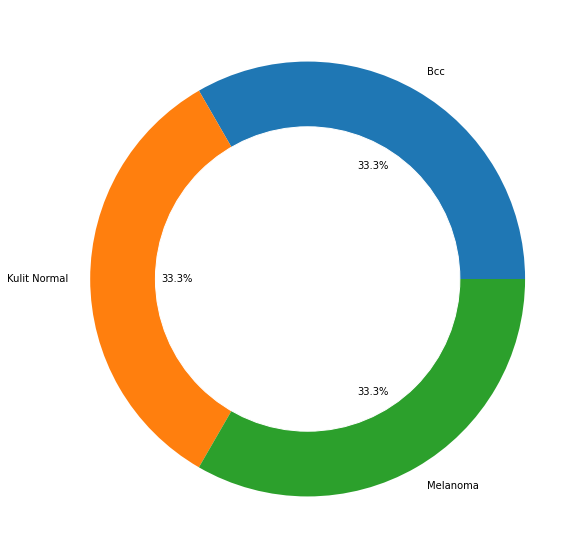

In [ ]:
label_distr = result_test['label'].value_counts()

label_name = ['Bcc',  'Kulit Normal', 'Melanoma']

plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(label_distr, 
        labels=label_name,  
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
print(label_distr)

Kulit Normal    15
Bcc             15
Melanoma        15
Name: label, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
# from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# ------------------------ Data Normalization menggunakan Decimal Scaling --------------------------------
def decimal_scaling(data):
    data = np.array(data, dtype=np.float32)
    max_row = data.max(axis=0)
    c = np.array([len(str(int(number))) for number in np.abs(max_row)])
    return data/(10**c)

# X = decimal_scaling(X.values)



X = decimal_scaling(
            result_test[['mean_h','mean_s', 'mean_v', 'std_h', 'std_s', 'std_v', 'var_h', 'var_s', 'var_v',
                    'skew_h','skew_s','skew_v','kurt_h','kurt_s','kurt_v',
                    'contrast_0', 'correlation_0', 'energy_0','homogeneity_0',
                    'contrast_45', 'correlation_45', 'energy_45','homogeneity_45',
                    'contrast_90', 'correlation_90', 'energy_90','homogeneity_90',
                    'contrast_135', 'correlation_135', 'energy_135','homogeneity_135'
                   ]].values
                    )

# ,
#                     'ASM_0','ASM_45','ASM_90','ASM_135', 'dissimilarity_0','dissimilarity_45',
#                      'dissimilarity_90','dissimilarity_135'

In [ ]:
le = LabelEncoder()
le.fit(result_test["label"].values)


print(" categorical label : \n", le.classes_)

Y = le.transform(result_test['label'].values)
Y = to_categorical(Y)

print("\n\n one hot encoding for sample 0 : \n", Y[0])

 categorical label : 
 ['Bcc' 'Kulit Normal' 'Melanoma']


 one hot encoding for sample 0 : 
 [1. 0. 0.]


In [ ]:
# %matplotlib inline
# %config InlineBackend.figure_format = 'svg'
# def plot_metric(history, metric):
#     train_metrics = history.history[metric]
#     val_metrics = history.history['val_'+metric]
#     epochs = range(1, len(train_metrics) + 1)
#     plt.plot(epochs, train_metrics)
#     plt.plot(epochs, val_metrics)
#     plt.title('Training and validation '+ metric)
#     plt.xlabel("Epochs")
#     plt.ylabel(metric)
#     plt.legend(["train_"+metric, 'val_'+metric])
#     plt.show()

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(5, 5))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
 import numpy as np
 
 def display_summary(true,pred):
     cnf_matrix = confusion_matrix(true,pred)
     fp = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)
     fn = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
     tp = np.diag(cnf_matrix)
     tn = cnf_matrix.sum() - (fp + fn + tp)
 
     fp = fp.astype(float)
     fn = fn.astype(float)
     tp = tp.astype(float)
     tn = tn.astype(float)
 
     #tn, fp, fn, tp = confusion_matrix(true,pred).ravel()
     print('confusion matrix')
     print(np.array([[tp,fp],[fn,tn]]))
     print('sensitivity is %f',1.*tp/(tp+fn))
     print('specificity is %f',1.*tn/(tn+fp))
     print('accuracy is %f',1.*(tp+tn)/(tp+tn+fp+fn))
     print('balanced accuracy is %',1./2*(1.*tp/(tp+fn)+1.*tn/(tn+fp)))

iterate kfold :  0  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(36, 31) (9, 31)
Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 1.1010 - accuracy: 0.3333
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 1.0996 - accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0988 - accuracy: 0.3056
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 1.0967 - accuracy: 0.3611
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 1.0902 - accuracy: 0.5278
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 1.0894 - accuracy: 0.3333
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 1.0890 - accuracy: 0.5833
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 1.0829 - accuracy: 0.5278
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 1.0873 - accuracy: 0.4722
Epoch 10/1

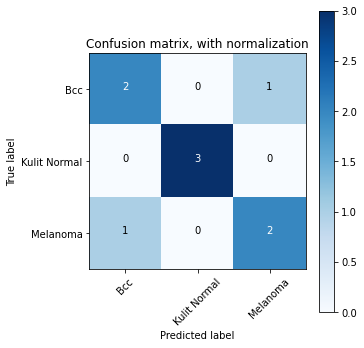

              precision    recall  f1-score   support

         Bcc       0.67      0.67      0.67         3
Kulit Normal       1.00      1.00      1.00         3
    Melanoma       0.67      0.67      0.67         3

    accuracy                           0.78         9
   macro avg       0.78      0.78      0.78         9
weighted avg       0.78      0.78      0.78         9

Deep Neural Network
confusion matrix
[[[2. 3. 2.]
  [1. 0. 1.]]

 [[1. 0. 1.]
  [5. 6. 5.]]]
sensitivity is %f [0.67 1.   0.67]
specificity is %f [0.83 1.   0.83]
accuracy is %f [0.78 1.   0.78]
balanced accuracy is % [0.75 1.   0.75]


iterate kfold :  1  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(36, 31) (9, 31)
Epoch 1/100
2/2 [==============================] - 1s 5ms/step - loss: 1.0999 - accuracy: 0.3056
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 1.0951 - accuracy: 0.3333
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 

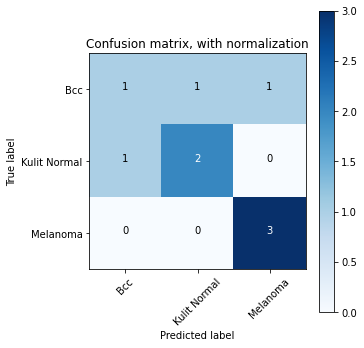

              precision    recall  f1-score   support

         Bcc       0.50      0.33      0.40         3
Kulit Normal       0.67      0.67      0.67         3
    Melanoma       0.75      1.00      0.86         3

    accuracy                           0.67         9
   macro avg       0.64      0.67      0.64         9
weighted avg       0.64      0.67      0.64         9

Deep Neural Network
confusion matrix
[[[1. 2. 3.]
  [1. 1. 1.]]

 [[2. 1. 0.]
  [5. 5. 5.]]]
sensitivity is %f [0.33 0.67 1.  ]
specificity is %f [0.83 0.83 0.83]
accuracy is %f [0.67 0.78 0.89]
balanced accuracy is % [0.58 0.75 0.92]


iterate kfold :  2  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(36, 31) (9, 31)
Epoch 1/100
2/2 [==============================] - 1s 8ms/step - loss: 1.0956 - accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 1.0959 - accuracy: 0.2778
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 

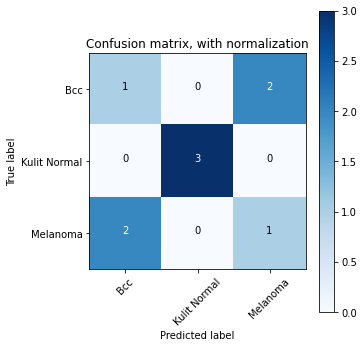

              precision    recall  f1-score   support

         Bcc       0.33      0.33      0.33         3
Kulit Normal       1.00      1.00      1.00         3
    Melanoma       0.33      0.33      0.33         3

    accuracy                           0.56         9
   macro avg       0.56      0.56      0.56         9
weighted avg       0.56      0.56      0.56         9

Deep Neural Network
confusion matrix
[[[1. 3. 1.]
  [2. 0. 2.]]

 [[2. 0. 2.]
  [4. 6. 4.]]]
sensitivity is %f [0.33 1.   0.33]
specificity is %f [0.67 1.   0.67]
accuracy is %f [0.56 1.   0.56]
balanced accuracy is % [0.5 1.  0.5]


iterate kfold :  3  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(36, 31) (9, 31)
Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 1.1011 - accuracy: 0.2500
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 1.0952 - accuracy: 0.2778
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 1

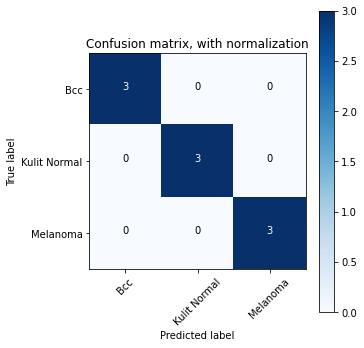

              precision    recall  f1-score   support

         Bcc       1.00      1.00      1.00         3
Kulit Normal       1.00      1.00      1.00         3
    Melanoma       1.00      1.00      1.00         3

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9

Deep Neural Network
confusion matrix
[[[3. 3. 3.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [6. 6. 6.]]]
sensitivity is %f [1. 1. 1.]
specificity is %f [1. 1. 1.]
accuracy is %f [1. 1. 1.]
balanced accuracy is % [1. 1. 1.]


iterate kfold :  4  +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
(36, 31) (9, 31)
Epoch 1/100
2/2 [==============================] - 1s 6ms/step - loss: 1.1011 - accuracy: 0.1944
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 1.0934 - accuracy: 0.3611
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0916 - accuracy: 0.333

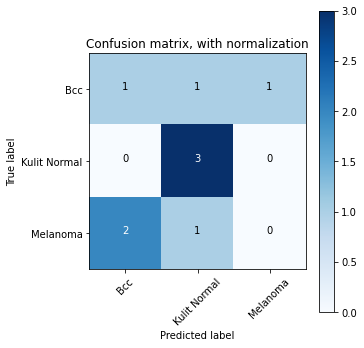

              precision    recall  f1-score   support

         Bcc       0.33      0.33      0.33         3
Kulit Normal       0.60      1.00      0.75         3
    Melanoma       0.00      0.00      0.00         3

    accuracy                           0.44         9
   macro avg       0.31      0.44      0.36         9
weighted avg       0.31      0.44      0.36         9

Deep Neural Network
confusion matrix
[[[1. 3. 0.]
  [2. 2. 1.]]

 [[2. 0. 3.]
  [4. 4. 5.]]]
sensitivity is %f [0.33 1.   0.  ]
specificity is %f [0.67 0.67 0.83]
accuracy is %f [0.56 0.78 0.56]
balanced accuracy is % [0.5  0.83 0.42]




Rata-Rata Akurasi
68.89% (+/- 19.12%)


In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.initializers import RandomNormal, Constant
from tensorflow import keras
from tensorflow.keras import regularizers
# Model with default batch normalization
from tensorflow.keras import layers

from tensorflow.keras.initializers import RandomNormal, Constant
from numpy.random import seed
from tensorflow import random
seed(0)
random.set_seed(0)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
cvscores = []
# for train, test in kfold.split(X, Y):
for i, (train_index, val_index) in enumerate(kfold.split(X, Y.argmax(1))):
  print('iterate kfold : ',i,' +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')

  x_train_kf, x_val_kf = X[train_index], X[val_index]
  y_train_kf, y_val_kf = Y[train_index], Y[val_index]

  print(x_train_kf.shape, x_val_kf.shape)

  model =keras.Sequential()
  model.add(Dense(31, input_dim=31, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(3,activation="softmax"))
  opt = keras.optimizers.RMSprop(learning_rate=0.001)
  model.compile(optimizer=opt, 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])
 
  history= model.fit(X[train_index], Y[train_index], epochs=100)
    # history= model.fit(X[train_index], Y[train_index], epochs=100, batch_size=10, validation_split=0.1, verbose=0)
  
	# evaluate the model

  scores = model.evaluate(X[val_index], Y[val_index], verbose=0)

  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  print("\n")

  # print('result ============================================================================================')
  # plot_metric(history, 'accuracy')
  # plot_metric(history, 'loss')

  # predict test data
  # y_pred=model.predict(X[val_index])
  # y_pred1=model.predict(X[train_index])

  y_pred=model.predict(x_val_kf)
  y_pred1=model.predict(x_train_kf)



  # Compute confusion matrix
  cnf_matrix = confusion_matrix(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  np.set_printoptions(precision=2)

  # Plot non-normalized confusion matrix
  plot_confusion_matrix(cnf_matrix, 
                      classes=['Bcc','Kulit Normal', 'Melanoma'],
                      normalize=False,
                      title='Confusion matrix, with normalization')

  print(classification_report(y_val_kf.argmax(axis=1), 
                            y_pred.argmax(axis=1), 
                            target_names=['Bcc',  'Kulit Normal', 'Melanoma']))
  print('Deep Neural Network')
  display_summary(y_val_kf.argmax(axis=1), y_pred.argmax(axis=1))
  print("\n")
  cvscores.append(scores[1] * 100)
print("\n")
print("Rata-Rata Akurasi")
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))




save_model_path = "/drive/My Drive/Moddel/model_new.h5"
model.save(save_model_path,include_optimizer=False)

# save_model_path = "/drive/My Drive/Model/model_" + str(i) + ".h5"
# model.save(save_model_path,include_optimizer=False)

In [ ]:
%cd /drive/My Drive/Moddel/

/drive/My Drive/Moddel
